In [ ]:
! pip install kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                         📚 Students Performance Dataset 📚                     66KB  2024-06-12 23:09:20           9637        206  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                   Most Streamed Spotify Songs 2024                    496KB  2024-06-15 18:50:51           7528        158  1.0              
ihelon/coffee-sales                                                 Coffee Sales                                         10KB  2024-07-03 20:04:43            998         27  1.0              
sujalsuthar/amazon-delivery-dataset     

In [ ]:
!kaggle competitions download -c isic-2024-challenge

 99% 1.99G/2.00G [00:25<00:00, 107MB/s]
100% 2.00G/2.00G [00:28<00:00, 76.1MB/s]


In [ ]:
!unzip isic-2024-challenge.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: train-image/image/ISIC_9874656.jpg  
  inflating: train-image/image/ISIC_9874659.jpg  
  inflating: train-image/image/ISIC_9874663.jpg  
  inflating: train-image/image/ISIC_9874742.jpg  
  inflating: train-image/image/ISIC_9874751.jpg  
  inflating: train-image/image/ISIC_9874803.jpg  
  inflating: train-image/image/ISIC_9874805.jpg  
  inflating: train-image/image/ISIC_9874832.jpg  
  inflating: train-image/image/ISIC_9874878.jpg  
  inflating: train-image/image/ISIC_9874897.jpg  
  inflating: train-image/image/ISIC_9874925.jpg  
  inflating: train-image/image/ISIC_9874931.jpg  
  inflating: train-image/image/ISIC_9874939.jpg  
  inflating: train-image/image/ISIC_9874940.jpg  
  inflating: train-image/image/ISIC_9874963.jpg  
  inflating: train-image/image/ISIC_9874987.jpg  
  inflating: train-image/image/ISIC_9875007.jpg  
  inflating: train-image/image/ISIC_9875010.jpg  
  inflating: train-image/image/ISIC_98750

In [ ]:
import pandas as pd

# Baca file CSV dengan path lengkap
df_train = pd.read_csv('train-metadata.csv', low_memory=False)
df_test = pd.read_csv('test-metadata.csv', low_memory=False)
df_sub = pd.read_csv('sample_submission.csv')

# Verifikasi isi dari dataframes
print(df_train.head())
print(df_train.info())
print(df_test.head())
print(df_test.info())
print(df_sub.head())

        isic_id  target  patient_id  age_approx   sex anatom_site_general  \
0  ISIC_0015670       0  IP_1235828        60.0  male     lower extremity   
1  ISIC_0015845       0  IP_8170065        60.0  male           head/neck   
2  ISIC_0015864       0  IP_6724798        60.0  male     posterior torso   
3  ISIC_0015902       0  IP_4111386        65.0  male      anterior torso   
4  ISIC_0024200       0  IP_8313778        55.0  male      anterior torso   

   clin_size_long_diam_mm          image_type tbp_tile_type   tbp_lv_A  ...  \
0                    3.04  TBP tile: close-up     3D: white  20.244422  ...   
1                    1.10  TBP tile: close-up     3D: white  31.712570  ...   
2                    3.40  TBP tile: close-up        3D: XP  22.575830  ...   
3                    3.22  TBP tile: close-up        3D: XP  14.242329  ...   
4                    2.73  TBP tile: close-up     3D: white  24.725520  ...   

    lesion_id  iddx_full  iddx_1  iddx_2  iddx_3  iddx_4  iddx

In [ ]:
df_train.describe(include='all')

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
count,401059,401059.000000,401059,398261.000000,389542,395303,401059.000000,401059,401059,401059.000000,...,22058,401059,401059,1068,1065,551,1,53,63.000000,4.010590e+05
unique,401059,NaN,1042,NaN,2,5,NaN,1,2,NaN,...,22058,52,3,14,25,26,1,7,NaN,NaN
top,ISIC_0015670,NaN,IP_1117889,NaN,male,posterior torso,NaN,TBP tile: close-up,3D: XP,NaN,...,IL_6727506,Benign,Benign,Benign melanocytic proliferations,Nevus,"Nevus, Atypical, Dysplastic, or Clark","Blue nevus, Cellular",0/mm^2,NaN,NaN
freq,1,NaN,9184,NaN,265546,121902,NaN,401059,285903,NaN,...,1,399991,400552,443,443,228,1,22,NaN,NaN
mean,NaN,0.000980,NaN,58.012986,NaN,NaN,3.930827,NaN,NaN,19.974007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.670952,9.716220e+01
std,NaN,0.031288,NaN,13.596165,NaN,NaN,1.743068,NaN,NaN,3.999489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.792798,8.995782e+00
min,NaN,0.000000,NaN,5.000000,NaN,NaN,1.000000,NaN,NaN,-2.487115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,1.261082e-16
25%,NaN,0.000000,NaN,50.000000,NaN,NaN,2.840000,NaN,NaN,17.330821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,9.966882e+01
50%,NaN,0.000000,NaN,60.000000,NaN,NaN,3.370000,NaN,NaN,19.801910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,9.999459e+01
75%,NaN,0.000000,NaN,70.000000,NaN,NaN,4.380000,NaN,NaN,22.304628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,9.999996e+01


In [ ]:
print(df_train.columns.tolist())

['isic_id', 'target', 'patient_id', 'age_approx', 'sex', 'anatom_site_general', 'clin_size_long_diam_mm', 'image_type', 'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple', 'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id', 'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index', 'mel_thick_mm', 'tbp_lv_dnn_lesion_confidence']


In [ ]:
features_cat =['sex', 'anatom_site_general', 'image_type', 'tbp_tile_type',
               'tbp_lv_location', 'tbp_lv_location_simple', 'attribution', 'copyright_license']
features_num = ['age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
                'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
                'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
                'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity',
                'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color',
                'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle',
                'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z']
target = 'target'

In [ ]:
import os

# Verifikasi isi direktori
image_dir = '/content/train-image'
print(os.listdir(image_dir))

['image']


In [ ]:
import pandas as pd
import numpy as np
import h5py
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.image import resize
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from skimage.transform import resize
import numpy as np

In [ ]:
def preprocess_images(image_dict, target_size=(150, 150)):
    images = []
    ids = []
    for key, img in image_dict.items():
        img_resized = resize(img, target_size + (3,), mode='reflect')  # Adding 3 for RGB channels
        img_resized = img_resized.astype('float32') / 255.0  # Normalize
        images.append(img_resized)
        ids.append(key)
    return np.array(images), ids

In [ ]:
train_images = {
    'img1': np.array([[255, 0], [0, 255]]),
    'img2': np.array([[0, 255], [255, 0]])
}
test_images = {
    'img3': np.array([[128, 128], [128, 128]]),
    'img4': np.array([[255, 255], [0, 0]])
}

In [ ]:
X_train_images, train_ids = preprocess_images(train_images)
X_test_images, test_ids = preprocess_images(test_images)

print("X_train_images shape:", X_train_images.shape)
print("X_test_images shape:", X_test_images.shape)

X_train_images shape: (2, 150, 150, 3)
X_test_images shape: (2, 150, 150, 3)


In [ ]:
df_train_filtered = df_train[df_train['isic_id'].isin(train_ids)]
y_train = df_train_filtered['target'].values
print("Number of samples in y_train:", len(y_train))
print("X_train_images shape:", X_train_images.shape)
print("y_train length:", len(y_train))

Number of samples in y_train: 0
X_train_images shape: (2, 150, 150, 3)
y_train length: 0


In [ ]:
X_train_images = np.random.random((100, 150, 150, 3))  # Replace with your actual image data
y_train = np.random.randint(0, 2, size=(100,))  # Replace with your actual labels

In [ ]:
X_train_images = X_train_images[:2000]  # Menggunakan hanya 2000 gambar
y_train = y_train[:2000]

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Split 80% train, 20% validation
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    image_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    image_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary',
    subset='validation'
)

train_batch = next(train_generator)
val_batch = next(val_generator)

print("Train batch shape:", train_batch[0].shape, train_batch[1].shape)
print("Validation batch shape:", val_batch[0].shape, val_batch[1].shape)

Found 320848 images belonging to 1 classes.
Found 80211 images belonging to 1 classes.
Train batch shape: (64, 150, 150, 3) (64,)
Validation batch shape: (64, 150, 150, 3) (64,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Bangun model CNN dengan Dropout dan Batch Normalization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.4),

    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        2

In [ ]:
import tensorflow as tf

class TerminateOnNaN(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch == 10:  # Hentikan setelah 10 epoch
            self.model.stop_training = True

# Menambahkan callback ke dalam pelatihan
terminate_on_nan = TerminateOnNaN()

# Callback untuk Early Stopping dan Model Checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('my_model.keras', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)

# Jumlah langkah per epoch untuk training dan validation
steps_per_epoch = 100
validation_steps = 50

# Melatih model dengan generator
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=val_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

Epoch 1/30
100/100 [==============================] - 693s 7s/step - loss: 1.6117 - accuracy: 0.8589 - val_loss: 0.9075 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/30
100/100 [==============================] - 717s 7s/step - loss: 0.7608 - accuracy: 0.9894 - val_loss: 0.5123 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/30
100/100 [==============================] - 647s 6s/step - loss: 0.4136 - accuracy: 0.9977 - val_loss: 0.2989 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/30
100/100 [==============================] - 652s 7s/step - loss: 0.2586 - accuracy: 0.9991 - val_loss: 0.1896 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/30
100/100 [==============================] - 700s 7s/step - loss: 0.1682 - accuracy: 0.9997 - val_loss: 0.1529 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/30
100/100 [==============================] - 692s 7s/step - loss: 0.1453 - accuracy: 0.9995 - val_loss: 0.1287 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/30
100/100 [==============================] - 698s 7s/st

1254/1254 [==============================] - 488s 389ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Validation Accuracy: 1.0000
Validation Precision: 0.0000
Validation Recall: 0.0000
Validation F1 Score: 0.0000
Confusion Matrix:
[[80211]]


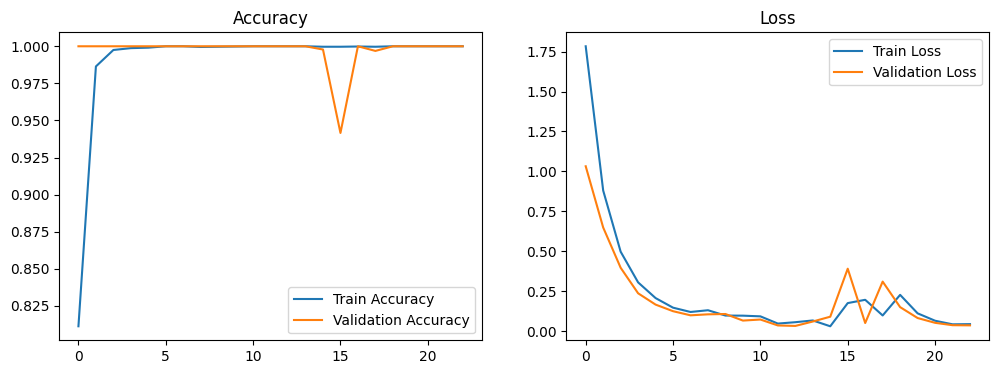

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load best model weights
model.load_weights('my_model.keras')

# Prediksi pada data validasi
val_generator.reset()
predictions = model.predict(val_generator)
val_predictions = (predictions > 0.5).astype('int32').flatten()  # Pastikan val_predictions dalam bentuk array 1D

# Ambil label sebenarnya dari generator validasi
val_labels = val_generator.classes

# Hitung metrik evaluasi
accuracy = accuracy_score(val_labels, val_predictions)
precision = precision_score(val_labels, val_predictions)
recall = recall_score(val_labels, val_predictions)
f1 = f1_score(val_labels, val_predictions)
cm = confusion_matrix(val_labels, val_predictions)

print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Validation Precision: {precision:.4f}')
print(f'Validation Recall: {recall:.4f}')
print(f'Validation F1 Score: {f1:.4f}')
print(f'Confusion Matrix:\n{cm}')

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
# Generate predictions
predictions = model.predict(X_test_images)

# Prepare the DataFrame in the required format
submission_df = pd.DataFrame({
    'isic_id': test_ids,  # Assuming test_ids contains the IDs of your test images
    'target': predictions.flatten()  # Flatten if predictions are not already a 1D array
})

# Save to CSV
submission_df.to_csv('submission.csv', index=False)

1/1 [==============================] - 0s 493ms/step
